In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

In [2]:
data_path = '../data/Phenotype_Master21_22.xlsx'  # Update the path if needed
data_A = pd.read_excel(data_path, sheet_name='A', index_col=0)
data_A = data_A.dropna(subset=['PLO'])  # Assuming 'PLO' is a column used for filtering
X = data_A.iloc[:, :-1]  # Features
y = data_A['PLO']  # Labels

X.fillna(X.median(), inplace=True)

In [3]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:

# PCA transformation
pca = decomposition.PCA(n_components=3)  # Using 3 components for potential 3D visualization
pca.fit(X_scaled)  # Fit the PCA model
X_pca = pca.transform(X_scaled)  # Transform the data using the fitted PCA model

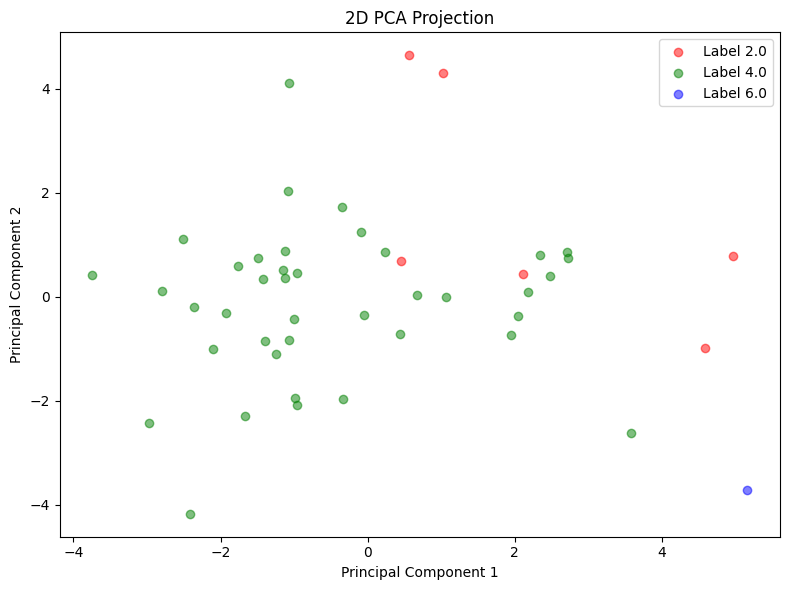

In [5]:
# 2D Plot
plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue']
labels = np.unique(y)
for color, label in zip(colors, labels):
    plt.scatter(X_pca[y == label, 0], X_pca[y == label, 1], label=f'Label {label}', color=color, alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA Projection')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

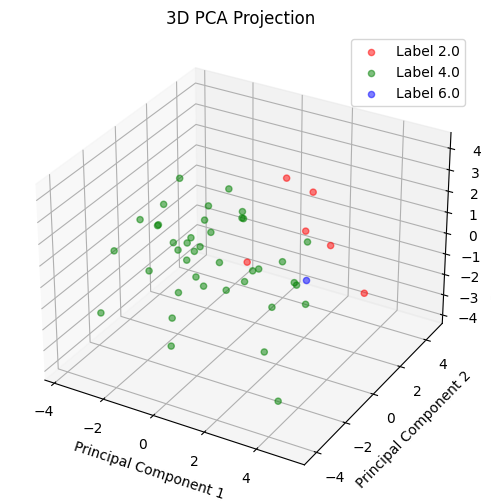

In [6]:

# 3D Plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
for color, label in zip(colors, labels):
    ax.scatter(X_pca[y == label, 0], X_pca[y == label, 1], X_pca[y == label, 2], color=color, label=f'Label {label}', alpha=0.5)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('3D PCA Projection')
plt.legend(loc='best')
plt.show()